# Data Spliting

In [47]:
import pandas as pd
import numpy as np
from utils.helper import read_data
import utils.processing as processing
import matplotlib.pyplot as plt
FOLDER = "data/100/"

## Load the Data

In [48]:
N_STATIC = 3
N_MOVING = 3
data_static = [read_data(FOLDER + "data_static_100_s_" + str(i) + ".csv") for i in range(N_STATIC)]
data_moving = [read_data(FOLDER + "data_moving_100_s_" + str(i) + ".csv") for i in range(N_MOVING)]
print(f"Shape static data: {data_static[0].shape}")
print(f"Shape moving data: {data_moving[0].shape}")

Shape static data: (3, 100000, 64)
Shape moving data: (3, 100000, 64)


## Get Phase from data
### Static Data

In [82]:
phases_static = []
for i in range(N_STATIC):
    phases, abses, _, _ = processing.do_processing(data_static[i]) 
    phases_static.append(np.mean(phases, axis=0))

# fig, axs = plt.subplots(N_STATIC)
# fig.suptitle('Static data')
# for i in range(N_STATIC):
#     axs[i].plot(phases_static[i])

### Get mean per 1000 phase values

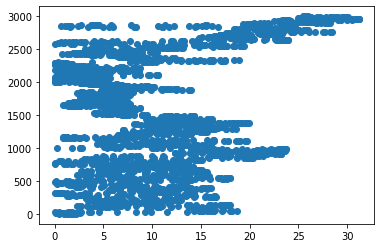

In [83]:
mean_n = 100
 # should be 3 x [len(phases_static) / mean_n] matrix with 0
mean_phases_static = np.zeros((3, int(len(phases_static[0])/mean_n)))

# mean_phases_static = phases_static[0::1000]

for j in range(3):
    for i, _ in enumerate(phases_static[j][::mean_n]):
        sub_list = phases_static[j][i*mean_n:] if (i+1)*mean_n > len(phases_static[j]) else phases_static[j][i*mean_n:(i+1)*mean_n]
        # print(sum(sub_list) / float(len(sub_list)))
        mean_phases_static[j][i] = sum(sub_list) / float(len(sub_list))
        

# print(np.mean(mean_phases_static[0]))

mean_phases_static = np.ravel(mean_phases_static)
mean_phases_static = [abs(i) for i in mean_phases_static]

x = list(range(0, len(mean_phases_static)))
plt.scatter(mean_phases_static, x)
# plt.scatter(mean_phases_static[1], x)
# plt.scatter(mean_phases_static[2], x)


### Moving Data

In [84]:
phases_moving = []
for i in range(N_MOVING):
    phases, abses, _, _ = processing.do_processing(data_moving[i]) 
    phases_moving.append(np.mean(phases, axis=0))


# fig, axs = plt.subplots(N_MOVING)
# fig.suptitle('Moving data')
# for i in range(N_MOVING):
#     axs[i].plot(phases_moving[i])

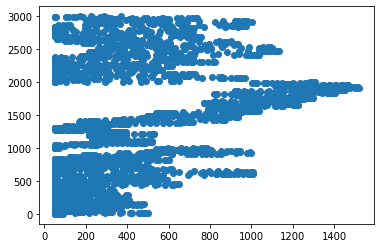

In [124]:
mean_n = 100
 # should be 3 x [len(phases_moving) / mean_n] matrix with 0
mean_phases_moving = np.zeros((3, int(len(phases_moving[0])/mean_n)))

# mean_phases_moving = phases_moving[0::1000]

for j in range(3):
    for i, _ in enumerate(phases_moving[j][::mean_n]):
        sub_list = phases_moving[j][i*mean_n:] if (i+1)*mean_n > len(phases_moving[j]) else phases_moving[j][i*mean_n:(i+1)*mean_n]
        # print(sum(sub_list) / float(len(sub_list)))
        mean_phases_moving[j][i] = sum(sub_list) / float(len(sub_list))
        

# print(np.mean(mean_phases_moving[0]))

mean_phases_moving = np.ravel(mean_phases_moving)
mean_phases_moving = [abs(i) for i in mean_phases_moving]
mean_phases_moving = [50 if el < 50 else el for el in mean_phases_moving]
# print(len(mean_phases_moving))

x = list(range(0, len(mean_phases_moving)))
plt.scatter(mean_phases_moving, x)

### Ploting moving and static data together

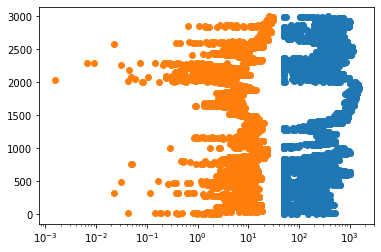

In [125]:
# mean_phases_moving = np.ravel(mean_phases_moving)
# mean_phases_moving = [abs(i) for i in mean_phases_moving]
# mean_phases_moving = [None if el < 50 else el for el in mean_phases_moving]


# mean_phases_static = np.ravel(mean_phases_static)
# mean_phases_static = [abs(i) for i in mean_phases_static]

x = list(range(0, len(mean_phases_moving)))
y = list(range(0, len(mean_phases_static)))
plt.scatter(mean_phases_moving, x)

plt.scatter(mean_phases_static, y)

plt.xscale('log')

# Linear Discriminant Analysis

Reshape data

In [146]:
mean_phases_static = np.array(mean_phases_static)
mean_phases_static = mean_phases_static.reshape(-1,1)
mean_phases_static_indexes = np.arange(len(mean_phases_static)).reshape(-1,1)
mean_phases_static_together = np.concatenate((mean_phases_static, mean_phases_static_indexes), axis=1)

mean_phases_moving = np.array(mean_phases_moving)
mean_phases_moving = mean_phases_moving.reshape(-1,1)
mean_phases_moving_indexes = np.arange(len(mean_phases_moving)).reshape(-1,1)
mean_phases_moving_together = np.concatenate((mean_phases_moving, mean_phases_moving_indexes), axis=1)


Labels for the data

In [149]:
from sklearn.preprocessing import OneHotEncoder
mean_phases_static_indexes = np.arange(mean_phases_static[0])
train_data = np.concatenate((mean_phases_static_together, mean_phases_moving_together))
# print(train_data.shape)
indexes = np.arange(train_data.shape[0])
train_labels = indexes >= train_data.shape[0]/2
# print("Shape train labels:", train_labels.shape)

(6000, 2)
Shape train labels: (6000,)


Get train and test sets

In [165]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(train_data, train_labels, test_size=0.1)
# print(f"Shape train_X: {train_X.shape}")
# print(f"Shape test_X: {test_X.shape}")
# print(f"Shape train_y: {train_y.shape}")
# print(f"Shape test_y: {test_y.shape}")

Train model

In [166]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

# Create SVM
clf = LinearDiscriminantAnalysis()

# Train the model using the training sets
clf.fit(train_X, train_y)

# Make predictions using the testing set
pred_y = clf.predict(test_X)
print(classification_report(test_y, pred_y))


              precision    recall  f1-score   support

       False       0.76      1.00      0.86       311
        True       1.00      0.66      0.79       289

    accuracy                           0.83       600
   macro avg       0.88      0.83      0.83       600
weighted avg       0.87      0.83      0.83       600

